<a href="https://colab.research.google.com/github/sohail08/Natural_Image_Classification_Alexnet/blob/main/natural_scenes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --ignore-installed kaggle


     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 153kB 8.5MB/s 
     |████████████████████████████████| 235kB 18.9MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 143kB 15.5MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 184kB 15.3MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=ac16ae8a913ff49befad13bbf29df9db6bc4e88afe1118ab82c96edc313d8821
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6769 sha256=20ebbc4cfb2348577ff55c46288cd5b1343656288e52b450c87d82fe9c067c8e
  Stored in directory: /root/.cache/pip/wheels/67/b8/ba/041548f30a6fc058c9b3f79

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadsohail123","key":"629ebb4ab3f9bc22d9c6dd446436e98a"}'}

In [6]:
!mkdir ~/.kaggle #created at root folder in colab

In [7]:
#copy
!cp kaggle.json ~/.kaggle

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:17<00:00, 20.4MB/s]
100% 346M/346M [00:17<00:00, 20.5MB/s]


In [10]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# copy zipped dataset into your drive
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
# from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow

In [2]:
# train_path = "/content/seg_train/seg_train"
train_path = "Scn_img_3\seg_train/seg_train"
#dataset path

In [3]:

# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing, etc.
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]



#making image as 227X227 for input of alexnet
# train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')
train = train_datagen.flow_from_directory(train_path, target_size=(64, 64), shuffle=True, class_mode='categorical')

    


Found 14034 images belonging to 6 classes.


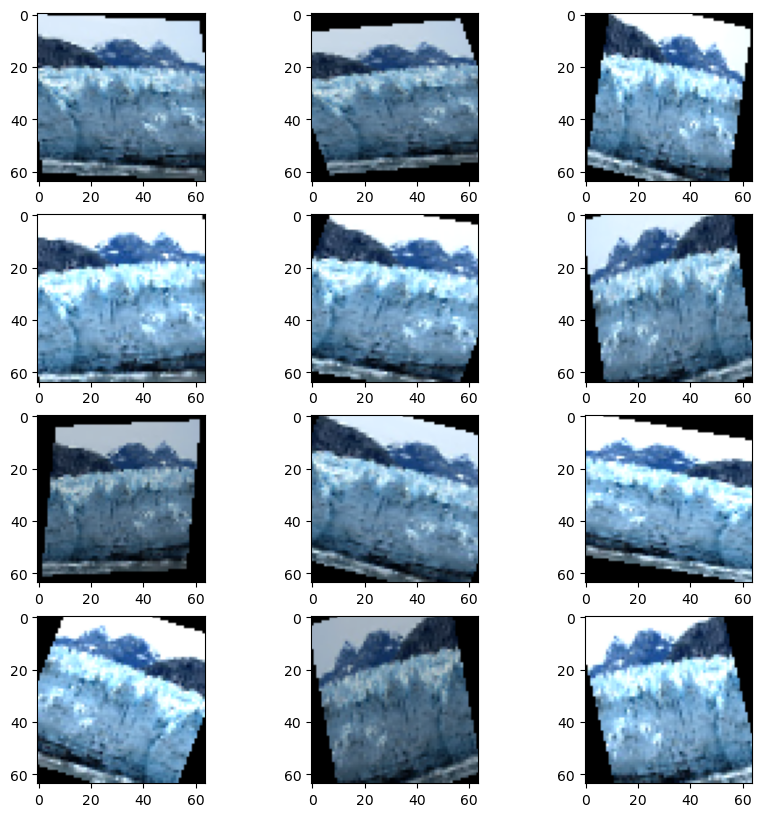

In [6]:

fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [14]:
from keras.models import Sequential
alexnet = Sequential()

# first convolutional layer with filters=96, kernal size=11X11, starides=4 named as "conv0"
# relu activation function will make negative values as zero
alexnet.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(64, 64, 3)))
# max pooling with filter size=3X3, and starides=2 named as "max0"
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=256, kernal size=5X5, named as "conv1"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    # max pooling with filter size=3X3, and starides=2 named as "max1"
alexnet.add(Conv2D(256, (5,5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))


alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
alexnet.add(Conv2D(256, (3,3), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
# alexnet.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# alexnet.add(Conv2D(384, (3,3), activation='relu'))


# flatten the input feature map. here it flattens the last feature map before it
alexnet.add(Flatten())


# add FC layers. Using less no. of neurons here
# alexnet.add(Dense(2049, activation='relu'))
alexnet.add(Dense(256, activation='relu'))
alexnet.add(Dense(512, activation='relu'))
# alexnet.add(Dropout(0.5))
alexnet.add(Dense(256, activation='relu'))
alexnet.add(Dense(128, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(64, activation='relu'))
alexnet.add(Dense(32, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
alexnet.add(Dense(6, activation='softmax'))


In [35]:
from keras.models import Sequential
alexnet = Sequential()

# first convolutional layer with filters=96, kernal size=11X11, starides=4 named as "conv0"
# relu activation function will make negative values as zero
alexnet.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(64, 64, 3)))
# max pooling with filter size=3X3, and starides=2 named as "max0"
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=256, kernal size=5X5, named as "conv1"
    # we are using padding='same' which means we do not want to drop any right most columns
    # so we will add 0 to fit our kernal to the input
    # relu activation function will make negative values as zero
    # max pooling with filter size=3X3, and starides=2 named as "max1"
alexnet.add(Conv2D(256, (5,5), padding='same', activation='relu'))
alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))


alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
# alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
# alexnet.add(Conv2D(384, (3,3), padding='same', activation='relu'))
# alexnet.add(Conv2D(256, (3,3), padding='same', activation='relu'))
# alexnet.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
# alexnet.add(Conv2D(64, (3,3), padding='same', activation='relu'))
# alexnet.add(Conv2D(384, (3,3), activation='relu'))


# flatten the input feature map. here it flattens the last feature map before it
alexnet.add(Flatten())


# add FC layers. Using less no. of neurons here
alexnet.add(Dense(384, activation='relu'))
# alexnet.add(Dense(256, activation='relu'))
# alexnet.add(Dense(512, activation='relu'))
# alexnet.add(Dropout(0.5))
alexnet.add(Dense(64, activation='relu'))
# alexnet.add(Dense(32, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
alexnet.add(Dense(6, activation='softmax'))


In [36]:

# printing summary of model
alexnet.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 16, 16, 96)        34944     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 8, 8, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 256)         614656    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 4, 4, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 384)         885120    
                                                                 
 flatten_5 (Flatten)         (None, 6144)             

In [37]:
# from keras.optimizers import SGD
# sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)

In [38]:
# compiling model
# using categorical_crossentropy loss to Computes the crossentropy loss between the labels and predictions
# -(ylog(p)+(1-y)log(1-p)) is used for cross entropy loss
# the optimizer adam utilizes the concept of momentum by adding fractions of previous gradients to the current one
# matrics =['acuracy'] Calculates how often predictions equal labels and returns
# This metric creates two local variables, total and count that are used to compute the
# frequency with which y_pred matches y_true
# alexnet.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])
alexnet.compile(optimizer = 'Adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
# alexnet.compile(optimizer = optimizer , loss = 'categorical_crossentropy' , metrics=['accuracy'])



In [39]:

# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist=alexnet.fit(train,epochs=20, batch_size=32)

Epoch 1/20
439/439 [==============================] - 166s 370ms/step - loss: 1.2940 - accuracy: 0.4800
Epoch 2/20
439/439 [==============================] - 158s 360ms/step - loss: 1.0329 - accuracy: 0.5971
Epoch 3/20
439/439 [==============================] - 158s 359ms/step - loss: 0.9434 - accuracy: 0.6350
Epoch 4/20
439/439 [==============================] - 158s 360ms/step - loss: 0.8955 - accuracy: 0.6557
Epoch 5/20
439/439 [==============================] - 155s 352ms/step - loss: 0.8454 - accuracy: 0.6791
Epoch 6/20
439/439 [==============================] - 155s 354ms/step - loss: 0.8162 - accuracy: 0.6961
Epoch 7/20
439/439 [==============================] - 155s 354ms/step - loss: 0.7898 - accuracy: 0.7012
Epoch 8/20
439/439 [==============================] - 158s 359ms/step - loss: 0.7620 - accuracy: 0.7136
Epoch 9/20
439/439 [==============================] - 155s 352ms/step - loss: 0.7508 - accuracy: 0.7170
Epoch 10/20
439/439 [==============================] - 155s 353m

In [40]:
_# loading validation data
# path_test = "/content/seg_test/seg_test"
path_test = "Scn_img_3\seg_test\seg_test"
test_datagen = ImageDataGenerator(rescale=1. / 255)
# test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')
test = test_datagen.flow_from_directory(path_test, target_size=(64,64), shuffle=False, class_mode='categorical')


Found 3000 images belonging to 6 classes.


In [41]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = alexnet.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

94/94 [==============================] - 49s 523ms/step


In [42]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())
class_labels

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [43]:
# checking cross validation accuracy/test accuracy
preds = alexnet.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

94/94 [==============================] - 10s 97ms/step - loss: 0.6698 - accuracy: 0.7597
Loss = 0.6697618365287781
Test Accuracy = 0.7596666812896729


In [44]:
import sklearn.metrics as metrics

In [45]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   buildings       0.73      0.71      0.72       437
      forest       0.96      0.83      0.89       474
     glacier       0.74      0.72      0.73       553
    mountain       0.72      0.71      0.71       525
         sea       0.72      0.72      0.72       510
      street       0.73      0.87      0.80       501

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



In [49]:


# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

In [50]:
confusion_mtx

array([[309,   5,  14,  25,  14,  70],
       [ 24, 395,   3,   6,   2,  44],
       [ 11,   2, 400,  65,  55,  20],
       [ 17,   1,  65, 371,  64,   7],
       [ 23,   4,  55,  43, 367,  18],
       [ 40,   6,   6,   6,   6, 437]], dtype=int64)

<Axes: >

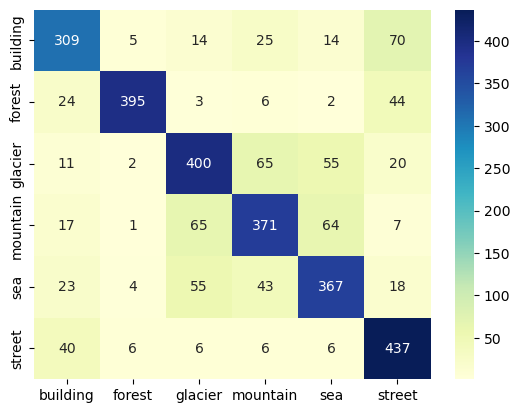

In [51]:
import seaborn as sns
class_names=["building","forest","glacier","mountain","sea","street"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [55]:
# loading prediction data

path_pred = "Scn_img_3\seg_pred\seg_pred"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(227,227),class_mode='categorical')


Found 0 images belonging to 0 classes.


In [56]:

predictions = alexnet.predict(predict)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [34]:

def get_category(predicted_output):
    path1 ="/content/seg_train/seg_train"
    return os.listdir(path1)[np.argmax(predicted_output)]


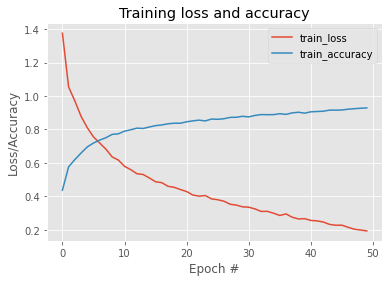

In [38]:
import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

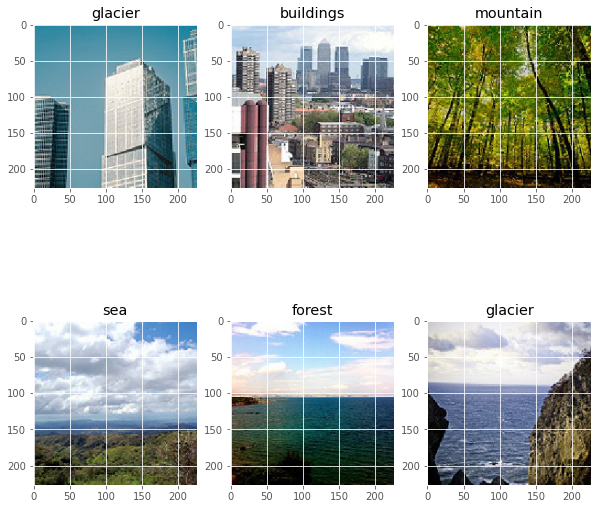

In [39]:

fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()


In [66]:
model_json = alexnet.to_json()
with open('network.json', 'w') as json_file:
    json_file.write(model_json)

In [67]:
from keras.models import save_model
network_saved = save_model(alexnet, 'weights.hdf5')

C:\Users\HP\AppData\Local\Temp\ipykernel_568\2170068653.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(alexnet, 'weights.hdf5')


In [68]:
with open('network.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_6", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_36_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_36", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 96, "kernel_size": [11, 11], "strides": [4, 4], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": n

In [69]:
import tensorflow as tf
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')

# network_loaded.compile(optimizer = 'Adam', loss='categorical_crossentropy',metrics=['accuracy'])

# learning_rate = 0.0001  
# optimizer = Adam(learning_rate=learning_rate)
network_loaded.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
network_loaded.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 16, 16, 96)        34944     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 8, 8, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 8, 8, 256)         614656    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 4, 4, 256)         0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 384)         885120    
                                                                 
 flatten_5 (Flatten)         (None, 6144)             

In [65]:
import cv2
from cv2 import imshow

image = cv2.imread('forest1.jpg')
image = cv2.resize(image, (64,64))
image = image / 255
image = image.reshape(-1, 64,64,3)
result = network_loaded.predict(image)
import numpy as np

result = np.argmax(result)

if result == 0:
    print('Buildings')
elif result == 1:
    print('Forests')
elif result == 2:
    print('Glaciers')
elif result == 3:
    print('Mountains')
elif result == 4:
    print('Sea')
elif result == 5:
    print('Streets')


1/1 [==============================] - 0s 76ms/step
Forests
